In [1]:
%matplotlib inline
import pandas as pd

In [2]:
mortality_rates = pd.read_csv('mortality.csv')

mortality_rates.shape

(5044, 5)

In [3]:
mortality_rates.head()

,Country,Year,Infant mortality rate (probability of dying between birth and age 1 per 1000 live births),Neonatal mortality rate (per 1000 live births),Under-five mortality rate (probability of dying by age 5 per 1000 live births)
0,Afghanistan,2015,66.3 [52.7-83.9],35.5 [19.2-56.4],91.1 [69.6-118.8]
1,Afghanistan,2014,68.1 [55.7-83.6],36.1 [19.5-57.5],93.9 [74.5-118.3]
2,Afghanistan,2013,69.9 [58.7-83.5],36.8 [20.1-58.6],96.7 [79.1-118.2]
3,Afghanistan,2012,71.7 [61.6-83.7],37.4 [20.4-60.0],99.5 [83.8-118.5]
4,Afghanistan,2011,73.4 [64.4-84.2],38.1 [20.7-61.0],102.3 [88.1-119.3]


In [4]:
mortality_rates.columns

Index(['Country', 'Year',
       'Infant mortality rate (probability of dying between birth and age 1 per 1000 live births)',
       'Neonatal mortality rate (per 1000 live births)',
       'Under-five mortality rate (probability of dying by age 5 per 1000 live births)'],
      dtype='object')

In [5]:
mortality_rates = mortality_rates[['Country' , 'Year' , 'Under-five mortality rate (probability of dying by age 5 per 1000 live births)']]

mortality_rates.rename(columns= {'Under-five mortality rate (probability of dying by age 5 per 1000 live births)' : 'under5_m_rate'}, inplace=True)

In [7]:
mortality_rates.head()

,Country,Year,under5_m_rate
0,Afghanistan,2015,91.1 [69.6-118.8]
1,Afghanistan,2014,93.9 [74.5-118.3]
2,Afghanistan,2013,96.7 [79.1-118.2]
3,Afghanistan,2012,99.5 [83.8-118.5]
4,Afghanistan,2011,102.3 [88.1-119.3]


In [8]:
mortality_rates['under5_m_rate'][0].split(' ')[0] 

'91.1'

In [12]:
def slice_rates(rate):
    return float(rate.split(' ')[0]) 

In [13]:
mortality_rates['under5_m_rate'] = mortality_rates['under5_m_rate'].apply(slice_rates) 

In [18]:
mortality_rates

,Country,Year,under5_m_rate
0,Afghanistan,2015,91.1
1,Afghanistan,2014,93.9
2,Afghanistan,2013,96.7
3,Afghanistan,2012,99.5
4,Afghanistan,2011,102.3
5,Afghanistan,2010,105.0
6,Afghanistan,2009,107.6
7,Afghanistan,2008,110.4
8,Afghanistan,2007,113.2
9,Afghanistan,2006,116.3


In [19]:
mortality_rates.describe()

,Year,under5_m_rate
count,5044.000000,5044.000000
mean,2002.500000,52.237550
std,7.500744,55.236709
min,1990.000000,1.900000
25%,1996.000000,11.900000
50%,2002.500000,28.300000
75%,2009.000000,78.300000
max,2015.000000,328.200000


In [22]:
mortality_rates[mortality_rates['Year']== 1990].sort_values(by = 'under5_m_rate')[:5] 

,Country,Year,under5_m_rate
2235,Japan,1990,6.3
2001,Iceland,1990,6.4
1585,Finland,1990,6.7
4341,Sweden,1990,6.9
3613,Republic of Korea,1990,7.1


In [27]:
 def yearly_data(year):
        """
        returns country wise mortality rate in desc order for
        given year
        """
        m_rates = mortality_rates[mortality_rates['Year'] == year].copy()
        #slicing for given year
        m_rates.drop('Year',axis=1, inplace=True)
        #dropping the year column which is now irrelevent
        m_rates.set_index('Country', inplace=True)
        #setting the index to country for operations
        return m_rates.sort_values(by = 'under5_m_rate')
        #returning the sorted data
    
        

In [24]:
m_rates_1990 = yearly_data(1990)

In [28]:
m_rates_1990.head(-1)

,under5_m_rate
Country,
Japan,6.3
Iceland,6.4
Finland,6.7
Sweden,6.9
Republic of Korea,7.1
Singapore,7.7
Monaco,7.8
Switzerland,8.2
Canada,8.3


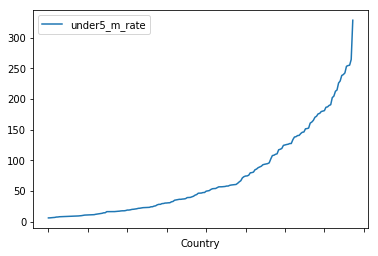

In [29]:
m_rates_1990.plot()

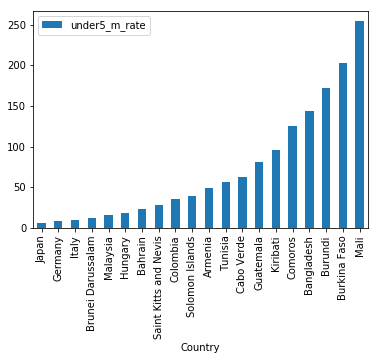

In [30]:
m_rates_1990.iloc[::10, :].plot.bar()

In [31]:
def country_data(country):
    """
    returns year wise mortality of country
    """
    country_df = mortality_rates[mortality_rates['Country']
                                == country].copy()
    #slicing data for the particular country
    country_df.drop('Country', axis = 1, inplace=True)
    #dropping irrevelant data
    country_df.set_index('Year', inplace=True)
    #setting the index as year to facilitate easier merge ops
    country_df.columns = [country]
    #setting name of column to country name
    return country_df
    

In [34]:
country_data('Egypt').head()

,Egypt
Year,
2015,24.0
2014,24.8
2013,25.8
2012,26.8
2011,27.9


In [33]:
country_data_egy.head()

,Egypt
Year,
2015,24.0
2014,24.8
2013,25.8
2012,26.8
2011,27.9


In [35]:
sweden_data = country_data('Sweden')
mali_data = country_data('Mali')
india_data = country_data('India')


In [36]:
sweden_data

,Sweden
Year,
2015,3.0
2014,3.0
2013,3.0
2012,3.0
2011,3.0
2010,3.1
2009,3.1
2008,3.2
2007,3.3


In [37]:
india_data

,India
Year,
2015,47.7
2014,49.8
2013,52.1
2012,54.5
2011,57.2
2010,59.9
2009,62.7
2008,65.6
2007,68.5


In [38]:
#merging
india_sweden = india_data.merge(sweden_data, left_index=True, right_index=True)
three_countries = india_sweden.merge(mali_data, left_index=True, right_index=True) 

In [39]:
three_countries.head()

,India,Sweden,Mali
Year,,,
2015,47.7,3.0,114.7
2014,49.8,3.0,118.3
2013,52.1,3.0,122.7
2012,54.5,3.0,127.0
2011,57.2,3.0,131.7


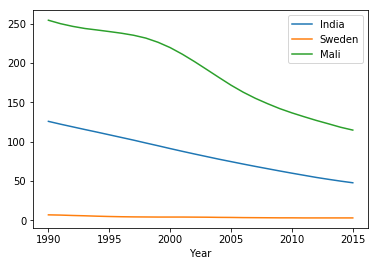

In [40]:
three_countries.plot()

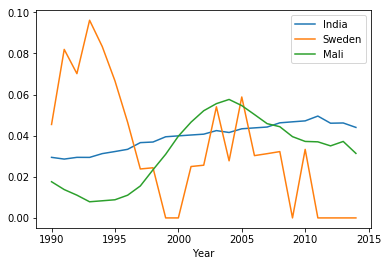

In [41]:
three_countries.pct_change().plot()

In [46]:
world_mortality_rates = pd.Series()

for year, group in mortality_rates.groupby('Year'):
    world_mortality_rates = world_mortality_rates.append(pd.Series(group['under5_m_rate'].mean(),index=[year]))

In [47]:
world_mortality_rates

1990    72.543299
1991    71.063402
1992    69.684021
1993    68.422680
1994    67.624742
1995    66.068557
1996    64.267010
1997    62.858247
1998    61.368041
1999    59.337629
2000    57.360309
2001    55.315979
2002    53.235567
2003    51.179897
2004    49.293299
2005    47.226804
2006    45.345876
2007    43.541237
2008    41.940722
2009    40.121134
2010    39.091753
2011    36.912887
2012    35.468041
2013    34.145361
2014    32.924742
2015    31.835052
dtype: float64

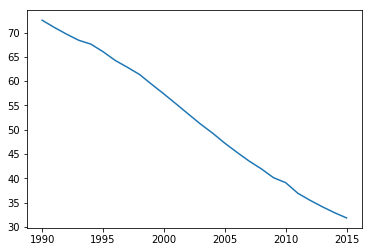

In [48]:
world_mortality_rates.plot()

In [49]:
countries = pd.read_csv('countries.csv')

In [50]:
countries.head()

,DimensionCode,DimensionMemberCode,DisplayString,DisplaySequence,URL,DS,FIPS,GEOMETRY,IOC,ISO,...,SHORTNAMEFR,WHO,WHOLEGALSTATUS,WHO_REGION,WHO_REGION_CODE,WMO,WORLD_BANK_INCOME_GROUP,WORLD_BANK_INCOME_GROUP_CODE,WORLD_BANK_INCOME_GROUP_GNI_REFERENCE_YEAR,WORLD_BANK_INCOME_GROUP_RELEASE_DATE
0,COUNTRY,AFG,Afghanistan,10,NaN,AFG,AF,AFG,AFG,AFG,...,Afghanistan,AFG,M,Eastern Mediterranean,EMR,AF,Low-income,WB_LI,2015.0,2016.0
1,COUNTRY,ALB,Albania,20,NaN,AL,AL,ALB,ALB,ALB,...,Albanie,ALB,M,Europe,EUR,AB,Upper-middle-income,WB_UMI,2015.0,2016.0
2,COUNTRY,DZA,Algeria,30,NaN,DZ,AG,DZA,ALG,DZA,...,Algérie,ALG,M,Africa,AFR,AL,Upper-middle-income,WB_UMI,2015.0,2016.0
3,COUNTRY,AND,Andorra,40,NaN,AND,AN,AND,AND,AND,...,Andorre,AND,M,Europe,EUR,NaN,High-income,WB_HI,2015.0,2016.0
4,COUNTRY,AGO,Angola,50,NaN,NaN,AO,AGO,ANG,AGO,...,Angola,ANG,M,Africa,AFR,AN,Upper-middle-income,WB_UMI,2015.0,2016.0


In [51]:
countries = countries[['DisplayString', 'WHO_REGION', 'WORLD_BANK_INCOME_GROUP']]

In [52]:
countries.head()

,DisplayString,WHO_REGION,WORLD_BANK_INCOME_GROUP
0,Afghanistan,Eastern Mediterranean,Low-income
1,Albania,Europe,Upper-middle-income
2,Algeria,Africa,Upper-middle-income
3,Andorra,Europe,High-income
4,Angola,Africa,Upper-middle-income


In [54]:
mortality_rates = pd.read_csv('mortality_processed.csv')
meta_data = mortality_rates.merge(countries, left_on='Country', right_on='DisplayString')
meta_data.drop(['DisplayString', 'Country'], axis=1, inplace=True)

In [55]:
meta_data.head()

,Year,under5_m_rate,WHO_REGION,WORLD_BANK_INCOME_GROUP
0,2016,70.4,Eastern Mediterranean,Low-income
1,2015,73.2,Eastern Mediterranean,Low-income
2,2014,76.1,Eastern Mediterranean,Low-income
3,2013,79.3,Eastern Mediterranean,Low-income
4,2012,82.8,Eastern Mediterranean,Low-income


In [57]:
regions = meta_data.WHO_REGION.unique()
years = meta_data.Year.unique()
regional_trends = pd.DataFrame(columns = regions, index= years)


In [58]:
regional_trends.head()

,Eastern Mediterranean,Europe,Africa,Americas,Western Pacific,South-East Asia
2016,NaN,NaN,NaN,NaN,NaN,NaN
2015,NaN,NaN,NaN,NaN,NaN,NaN
2014,NaN,NaN,NaN,NaN,NaN,NaN
2013,NaN,NaN,NaN,NaN,NaN,NaN
2012,NaN,NaN,NaN,NaN,NaN,NaN


In [60]:
#filling
for name,group in meta_data.groupby(['WHO_REGION', 'Year']):
    region, year = name
    
    regional_trends.loc[year, region]= group['under5_m_rate'].mean()

In [61]:
regional_trends.head()

,Eastern Mediterranean,Europe,Africa,Americas,Western Pacific,South-East Asia
2016,32.7619,8.20943,68.0064,17.8943,22.2,29.1909
2015,33.6857,8.51509,70.6723,18.38,22.8815,30.4636
2014,34.6524,8.83962,73.4745,18.8686,23.5407,31.8909
2013,35.6524,9.19434,76.5511,19.36,24.2185,33.4455
2012,36.7143,9.57925,79.8723,19.8514,24.9074,35.0909


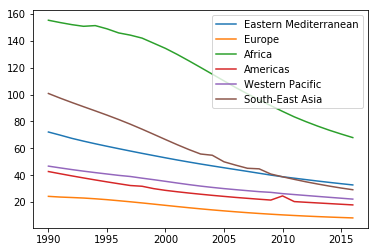

In [62]:
regional_trends.plot()

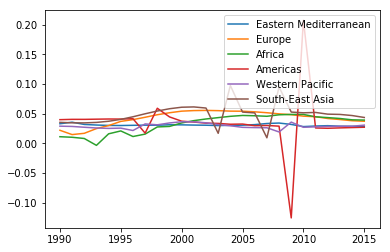

In [64]:
regional_trends.pct_change().plot() 

In [65]:
income = meta_data.WORLD_BANK_INCOME_GROUP.unique()
years = meta_data.Year.unique()
income_trends = pd.DataFrame(columns = income, index= years)

In [67]:
for name,group in meta_data.groupby(['WORLD_BANK_INCOME_GROUP', 'Year']):
    income, year = name
    
    income_trends.loc[year, income]= group['under5_m_rate'].mean()

In [68]:
income_trends.head()

,Low-income,Upper-middle-income,High-income,Not classified,Lower-middle-income
2016,73.0625,21.087,6.15263,11.1,40.554
2015,75.95,21.8204,6.30526,11.6,41.936
2014,79.125,22.5093,6.45263,12.1,43.378
2013,82.5875,23.2556,6.62105,12.7,44.892
2012,86.3188,24.0926,6.80175,13.3,46.436


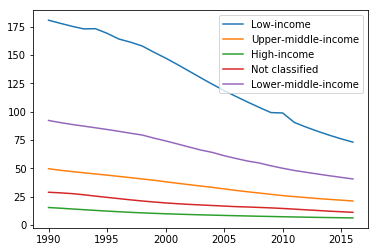

In [69]:
income_trends.plot()

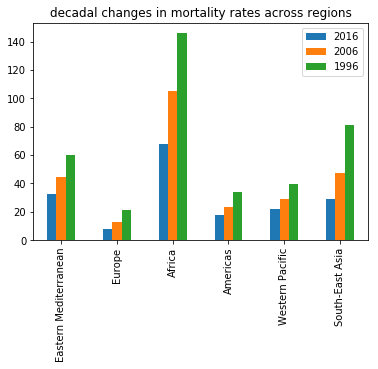

In [71]:
regional_trends.transpose().iloc[:,::10].plot.bar(title = 'decadal changes in mortality rates across regions') 